<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project(Hayatt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1~5번 블록은 필요한 기능을 설치하고 라이브러리들을 선언해줍니다.

특히 1번 블록의 경우 설치가 정상적으로 진행되지 않는다면 github에서 확인해주세요

3번은 폰트를 업로드 해줍니다. 파일명은 this.tff로 고정합니다.

In [ ]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
import copy
from wordcloud import WordCloud 
from konlpy.tag import Okt
from collections import Counter
from google.colab import files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
files.upload()

In [4]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwordsHayatt.xlsx?raw=true').values.tolist()

In [5]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

In [6]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data_hayatt.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰..."
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...
...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러..."
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔..."
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트..."
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...


형태소 단위로 파일을 잘라주는 함수입니다. 각 기능은 DAP_project.ipynb (시그니엘 분석)에서 다루었으므로 생략하겠습니다.

In [7]:
okt = Okt()
def regularExpression (text):
  exp = re.compile('[^ 가-힣]').sub('', text);
  return exp
def corpusToNounsCounter (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter  
def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  return nouns

In [10]:
totalCorpus = "".join(df['review'].tolist())
totalCount = corpusToNounsCounter(totalCorpus)

In [11]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

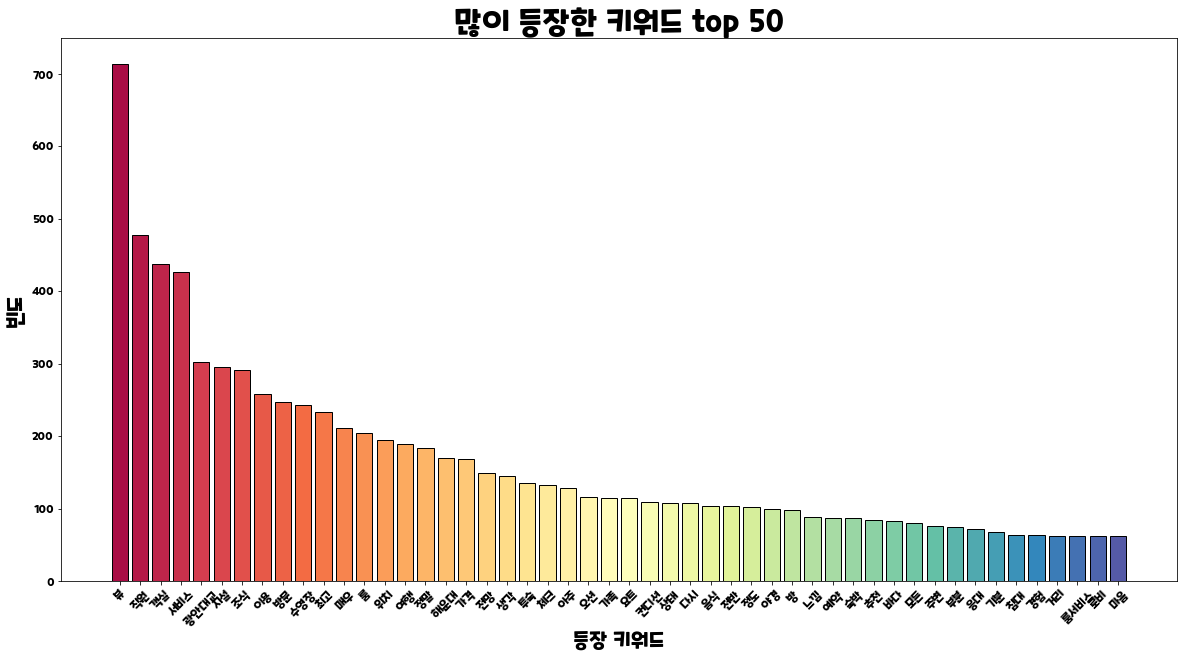

In [12]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

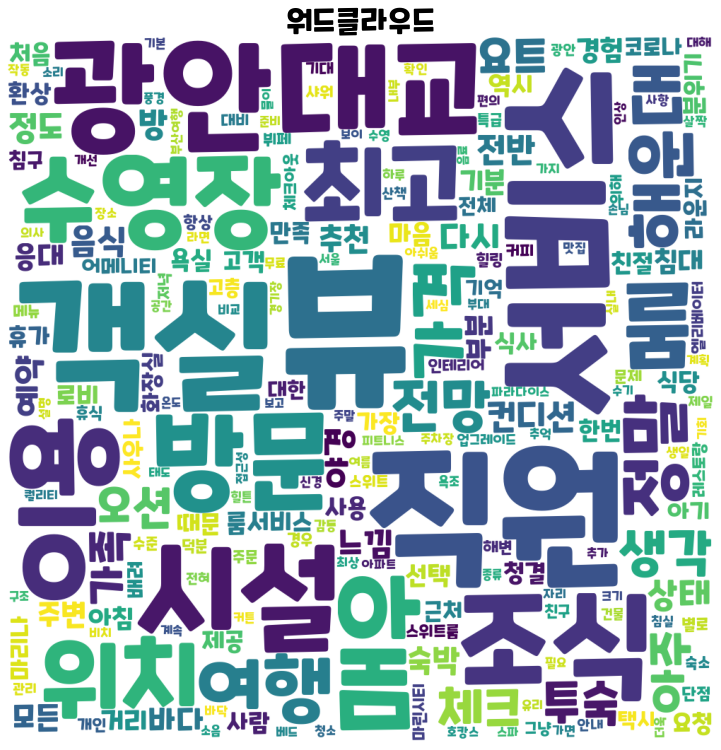

In [13]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

In [14]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 38), (2, 31), (3, 55), (4, 271), (5, 905)]

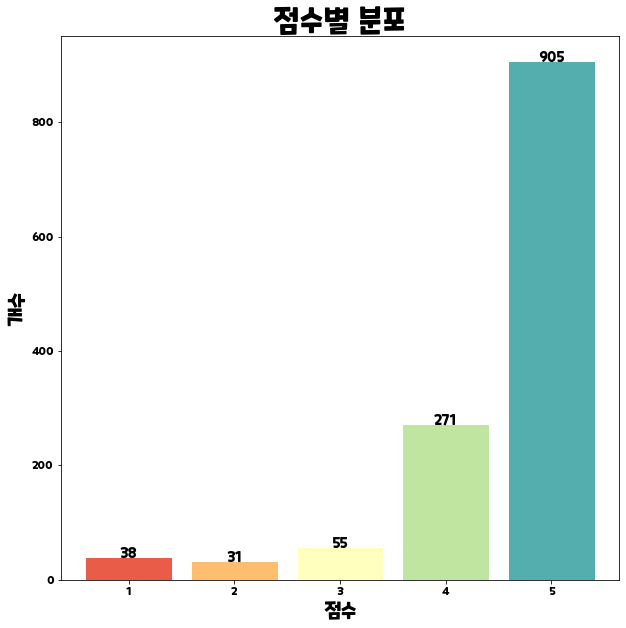

In [15]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [16]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNounsCounter("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNounsCounter("".join(dislikesCorpus))

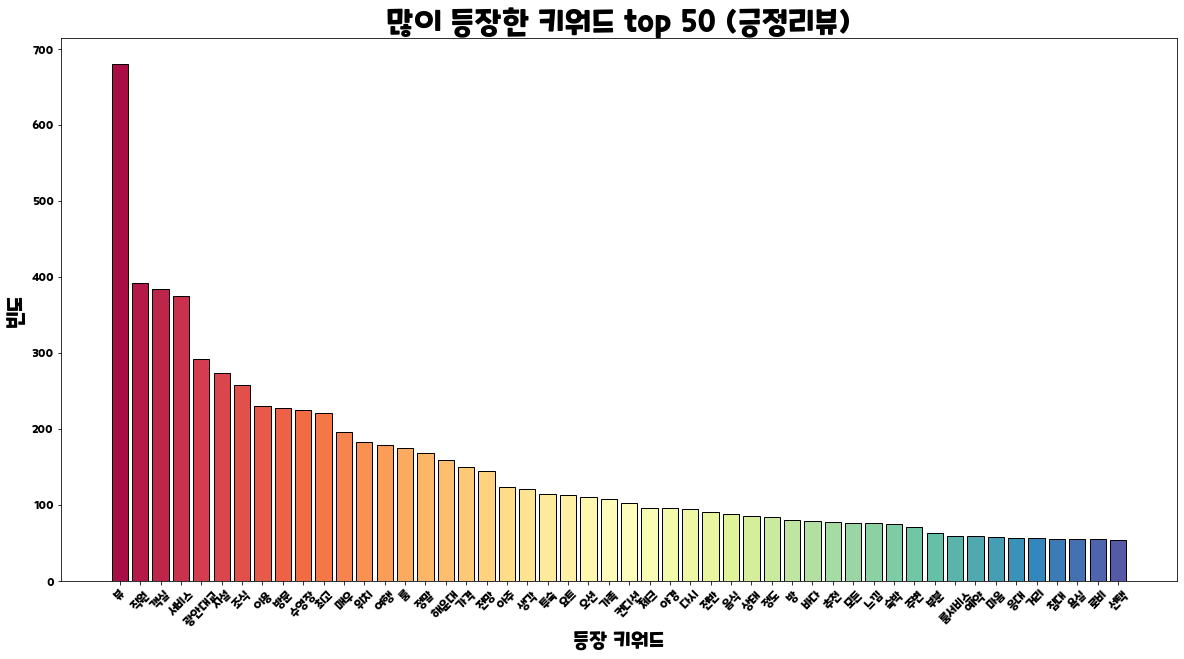

In [17]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

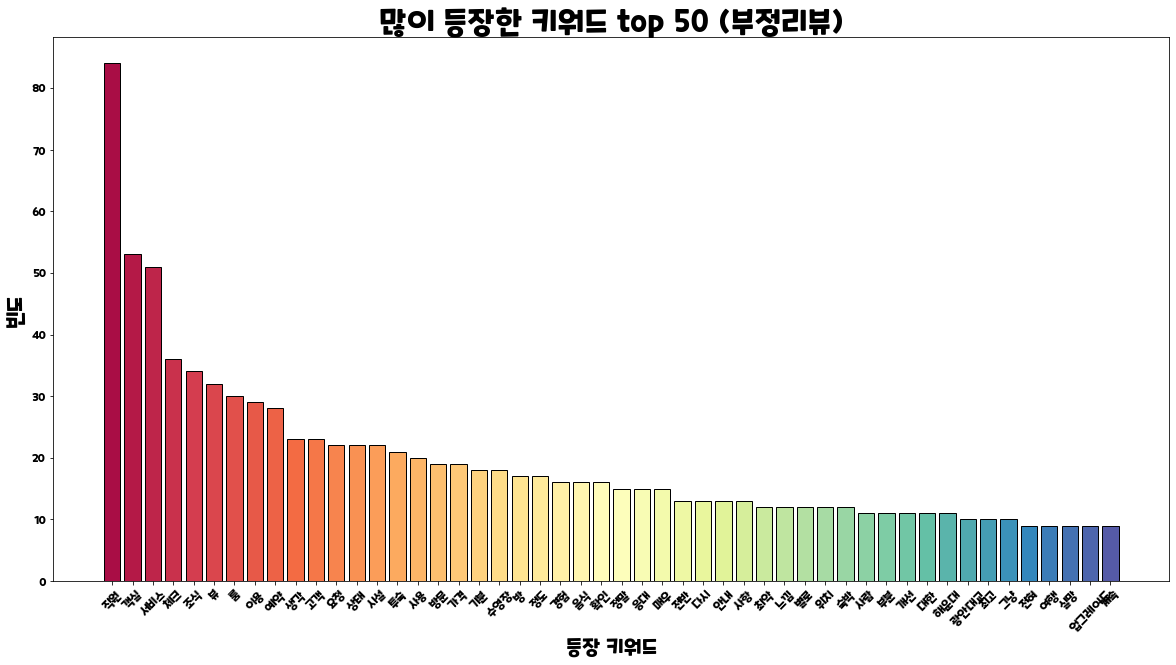

In [18]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

boW 벡터와 관련하여 TF-IDF 변환을 진행합니다.


이와 관련해서는 DAP_project.ipynb (시그니엘 분석)에서 다루었으므로 생략합니다.

In [19]:
vect =  CountVectorizer(tokenizer = corpusToNouns)
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
word_count_dict = dict(zip(word_list, count_list))

In [21]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [22]:
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0

In [24]:
df_test = copy.deepcopy(df)
df_test['likeDislike'] = df_test['score'].apply(likeDislike)

In [25]:
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test)

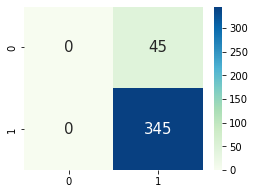

accurancy:  0.8846153846153846
precision:  0.8846153846153846
recall:  1.0
F1:  0.9387755102040816


In [26]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

불균형으로 학습에 문제가 발생하였으므로 동일한 값으로 sample 조정해서 다시 진행합니다.

random_state의 경우 학습결과가 좋은 아이로 채용했습니다.

In [27]:
df_test['likeDislike'].value_counts()

1    1176
0     124
Name: likeDislike, dtype: int64

In [28]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(124, random_state=18).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(124, random_state=12).index.tolist()

In [29]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

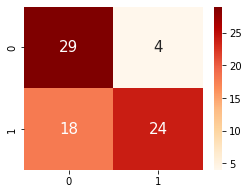

accurancy:  0.7066666666666667
precision:  0.8571428571428571
recall:  0.5714285714285714
F1:  0.6857142857142857


In [30]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

결과를 그래프로 출력합니다. 부정리뷰 가중치의 경우, 절댓값으로 음수를 양수로 바꾸어서 표현했습니다.

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25]),
 <a list of 9 Text major ticklabel objects>)

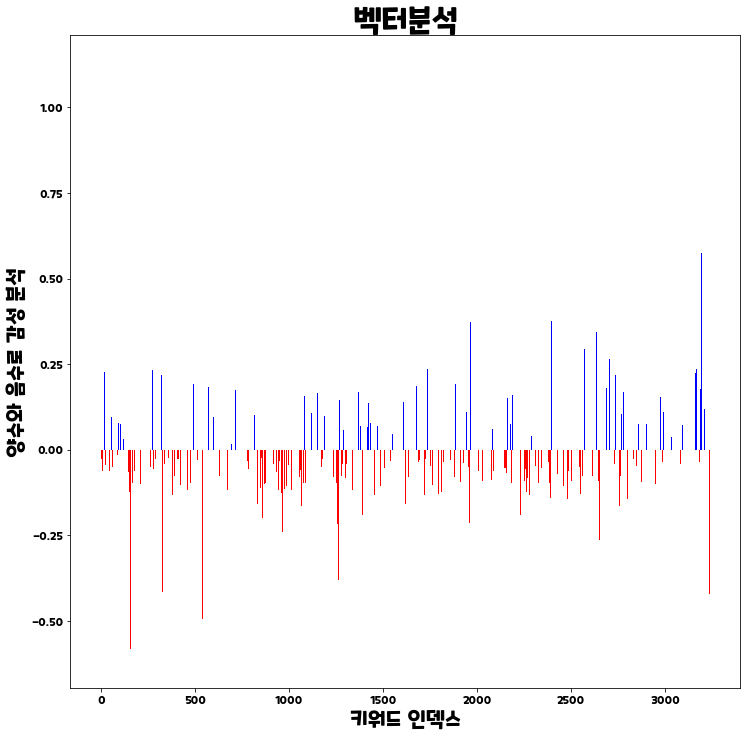

In [68]:
color = pd.DataFrame(columns = {'positive'})
color['positive'] = logi2.coef_[0] > 0
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize= (12, 12))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0], color = color.positive.map({True: 'b', False: 'r'}))
plt.xlabel("키워드 인덱스",fontproperties=font_label)
plt.ylabel("양수와 음수로 감성 분석",fontproperties=font_label)
plt.title("벡터분석",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)

In [33]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [34]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

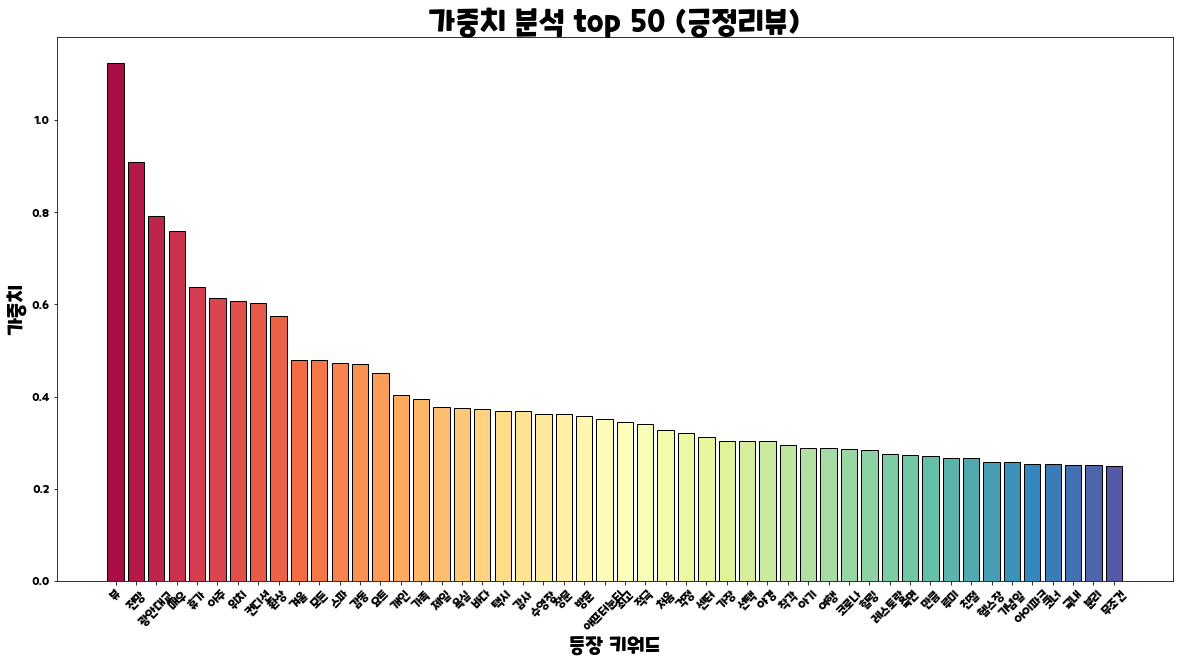

In [63]:
likes_tfidf50 = []
count = 0
for x in pos_index[:50]:
  likes_tfidf50.append((invert_index_vectorizer[x[1]], x[0]))
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_tfidf50]
y = [y for (x, y) in likes_tfidf50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("가중치",fontproperties=font_label)
plt.title("가중치 분석 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

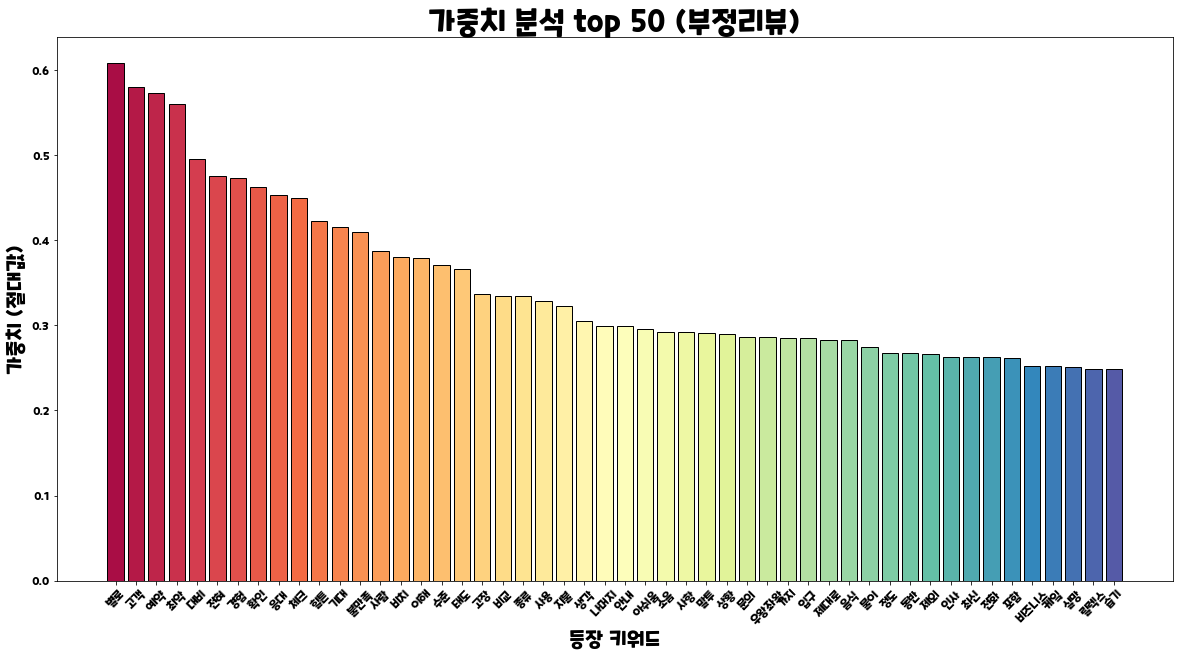

In [67]:
dislikes_tfidf50 = []
count = 0
for x in neg_index[:50]:
  dislikes_tfidf50.append((invert_index_vectorizer[x[1]], abs(x[0])))
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_tfidf50]
y = [y for (x, y) in dislikes_tfidf50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("가중치 (절대값)",fontproperties=font_label)
plt.title("가중치 분석 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()